In [28]:
from comet_ml import Experiment
from config import api_key

# Setting the API key (saved as environment variable)
experiment = Experiment(
    api_key=api_key,
    # or
    # api_key=os.environ.get("COMET_API_KEY"),
    project_name='comet-examples')

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/krisograbek/comet-examples/77c82d286e304584bf526d59c4420c75



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Data

In [3]:
ccc = pd.read_excel('../../datasets/credit_card_clients.xls', skiprows=[0])

## EDA

In [4]:
ccc.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
ccc.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Perfect, every column is numerical
Let's check for missing values

In [6]:
ccc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

No missing values :)
What about uniqueness

In [7]:
ccc.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [8]:
pay_cols = ["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]
ccc[pay_cols].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


AGE and LIMIT_BAL are good candidates to create ranges for them. Let's create 5 ranges for each

<AxesSubplot:>

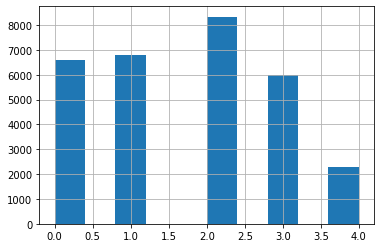

In [9]:
# define bins
ccc["age_cat"] = pd.cut(ccc["AGE"],
                        bins=[0, 27, 32, 40, 50, np.inf],
                        labels=[1, 2, 3, 4, 5])
# convert to numerical
ccc["age_cat"] = ccc["age_cat"].cat.codes

ccc["age_cat"].hist()

<AxesSubplot:>

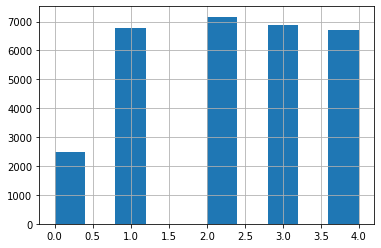

In [10]:
# create categories
ccc["limit_cat"] = pd.cut(ccc["LIMIT_BAL"],
                        bins=[0, 25000, 75000, 150000, 250000, np.inf],
                        labels=[1, 2, 3, 4, 5])
# convert to numerical
ccc["limit_cat"] = ccc["limit_cat"].cat.codes

ccc["limit_cat"].hist()

Let's change the target column name

In [11]:
# rename target column
ccc.rename(columns = {'default payment next month': 'target'}, inplace=True)
ccc.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'target',
       'age_cat', 'limit_cat'],
      dtype='object')

In [12]:
ccc.drop(["ID", "AGE", "LIMIT_BAL"], inplace=True, axis=1)

## Splitting the Data

In [13]:
from sklearn.model_selection import train_test_split


X = ccc.copy()
y = ccc["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=31)

In [14]:
X_test.drop("target", axis=1, inplace=True)
X_test.head()

/home/kris/dev/comet/venv/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,age_cat,limit_cat
7220,1,1,2,0,0,0,0,0,0,7032,...,11106,12500,12500,3000,4000,2000,2000,5000,1,0
10417,2,2,1,-2,-2,-2,-2,-2,-2,4018,...,4797,2659,6330,6844,1467,9594,2659,7076,2,3
24620,1,2,1,0,0,0,0,0,0,11030,...,14441,14743,1203,1300,1235,516,534,537,1,1
26531,2,6,1,0,0,0,0,0,0,30419,...,8114,8382,1481,1276,1132,300,400,370,4,1
18405,2,1,2,0,0,0,0,0,0,34975,...,13104,13314,2000,1241,1157,1104,814,715,0,3


In [15]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ["SEX", "MARRIAGE", "EDUCATION", "age_cat", "limit_cat"]

cat_encoder = OneHotEncoder()
cat_1hot = cat_encoder.fit_transform(X_train[cat_cols])
print(cat_encoder.categories_)

[array([1, 2]), array([0, 1, 2, 3]), array([0, 1, 2, 3, 4, 5, 6]), array([0, 1, 2, 3, 4], dtype=int8), array([0, 1, 2, 3, 4], dtype=int8)]


In [16]:
def paid_duly(value):
    return -1 if value <= 0 else value

X_train["pay_1"] = X_train["PAY_0"].apply(paid_duly)
X_train["pay_2"] = X_train["PAY_2"].apply(paid_duly)
X_train["pay_3"] = X_train["PAY_3"].apply(paid_duly)
X_train["pay_4"] = X_train["PAY_4"].apply(paid_duly)
X_train["pay_5"] = X_train["PAY_5"].apply(paid_duly)
X_train["pay_6"] = X_train["PAY_6"].apply(paid_duly)

/home/kris/dev/comet/venv/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [17]:
non_num_cols = cat_cols + ["target"]
num_cols = list(X_train.drop(non_num_cols, axis=1))
num_cols

['PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'pay_1',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6']

### OneHotEncoder for ranges

Repayment stats. If there was delay, the column shows the number of months delayed. If not values are 0, -1 or -2. 
Let's convert the values a litte. If there were no delay, let's just keep the value -1

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(), cat_cols)
])

X_train_prepared = full_pipeline.fit_transform(X_train)


In [19]:
X_train_prepared.shape

(24000, 47)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

lin_reg_preds = lin_reg.predict(X_train_prepared) > 0.5
lin_reg_preds = [int(pred) for pred in lin_reg_preds]


acc_lin = accuracy_score(lin_reg_preds, y_train)
acc_lin

0.81875

In [21]:
from sklearn.ensemble import RandomForestClassifier

rnd_for = RandomForestClassifier(n_estimators=10)
rnd_for.fit(X_train_prepared, y_train)

rnd_preds = rnd_for.predict(X_train_prepared) > 0.5
rnd_preds = [int(pred) for pred in rnd_preds]


acc_rnd = accuracy_score(rnd_preds, y_train)
acc_rnd

0.9762916666666667

In [26]:
experiment.log_metric("acc", acc_rnd)
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/krisograbek/comet-examples/f2bf52b2d109417e942fe02f9a94cb2c
COMET INFO:   Metrics:
COMET INFO:     acc : 0.9762916666666667
COMET INFO:   Parameters:
COMET INFO:     bootstrap                : True
COMET INFO:     categories               : auto
COMET INFO:     ccp_alpha                : 1
COMET INFO:     class_weight             : 1
COMET INFO:     copy                     : True
COMET INFO:     copy_X                   : True
COMET INFO:     criterion                : gini
COMET INFO:     drop                     : 1
COMET INFO:     dtype                    : <class 'numpy.float64'>
COMET INFO:     fit_intercept            : True
COMET INFO:     handle_unknown           : error
COMET INFO:     max_depth                : 1
COMET INFO:     max_fea

In [22]:
# X_test_prepared = full_pipeline.transform(X_test)

# preds = rnd_for.predict(X_test_prepared) > 0.5
# preds = [int(pred) for pred in preds]

# accuracy_score(preds, y_test)

In [23]:
corr_train = X_train.corr()
corr_train["target"].sort_values(ascending=False)

target       1.000000
pay_1        0.398359
pay_2        0.335238
PAY_0        0.327515
pay_3        0.291792
pay_4        0.275901
PAY_2        0.267431
pay_5        0.267244
pay_6        0.250647
PAY_3        0.237539
PAY_4        0.220629
PAY_5        0.206924
PAY_6        0.192406
EDUCATION    0.026048
age_cat      0.006794
BILL_AMT6   -0.002905
BILL_AMT5   -0.004123
BILL_AMT4   -0.007283
BILL_AMT3   -0.010579
BILL_AMT2   -0.011316
BILL_AMT1   -0.016867
MARRIAGE    -0.020973
SEX         -0.042375
PAY_AMT6    -0.051738
PAY_AMT5    -0.057194
PAY_AMT4    -0.057485
PAY_AMT3    -0.060869
PAY_AMT2    -0.067170
PAY_AMT1    -0.073088
limit_cat   -0.165068
Name: target, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

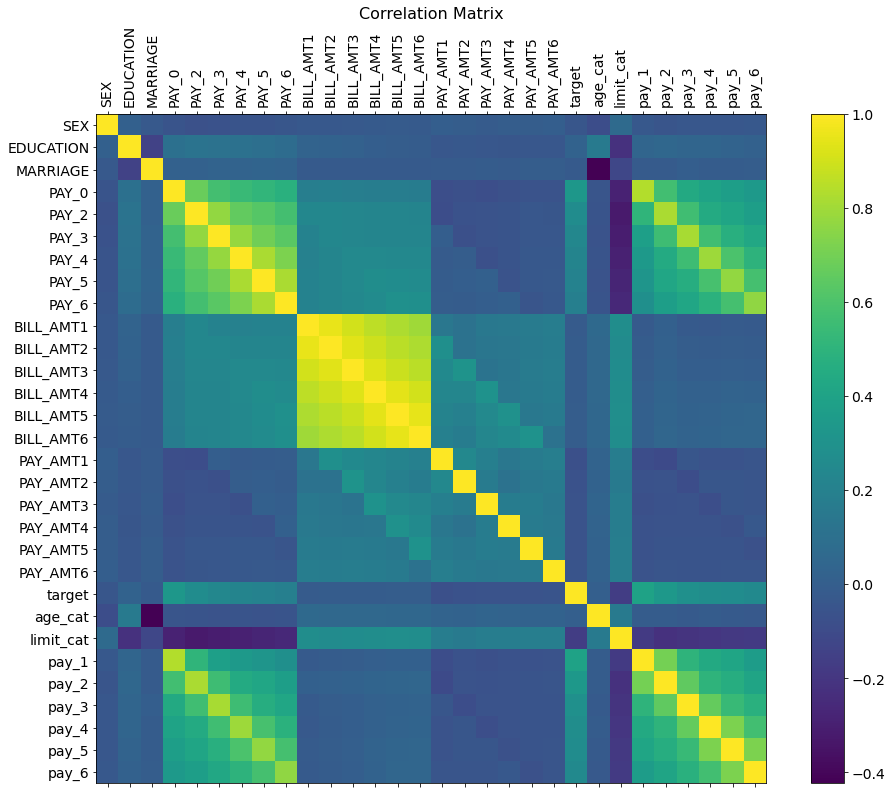

In [24]:
f = plt.figure(figsize=(16, 12))
plt.matshow(X_train.corr(), fignum=f.number)
plt.xticks(range(X_train.select_dtypes(['number']).shape[1]), X_train.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(X_train.select_dtypes(['number']).shape[1]), X_train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)